In [33]:

import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
plt.rc('font',family='sans-serif')
# fig, ax = plt.subplots()
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
plt.rc('font')

est1 = np.array([[0.69726462, 0.67488807, 0.69599892], [0.69839741, 0.67233188, 0.68977626], [0.70616668, 0.67666972, 0.69952475]])
error_est1 = np.array([[0.00355819, 0.00415612, 0.00376149], [0.00209504, 0.0055132, 0.00572407], [0.00167481, 0.00442868, 0.00591386]])
est2 = np.array([[0.72525052, 0.6943029, 0.72079609], [0.72025943, 0.69322807, 0.72354069], [0.72466858, 0.6929773, 0.72411167]])
error_est2 = np.array([[0.01181638, 0.0212155, 0.01513417], [0.01140811, 0.01937338, 0.01474513], [0.01025868, 0.01794607, 0.01303427]])
est3 = np.array([[0.63265456, 0.60533727, 0.64539805], [0.63272157, 0.6039505, 0.64406837], [0.63200696, 0.60378234, 0.64339875]])
error_est3 = np.array([[2.82339687e-05, 5.06445465e-05, 1.11022302e-16], [8.10237861e-05, 4.15404686e-04, 8.40981003e-04], [8.94653365e-05, 3.66054493e-04, 5.32966580e-04]])
est4 = np.array([[0.68508786, 0.65197622, 0.6891084], [0.67073746, 0.65429288, 0.68412066], [0.67842228, 0.65560372, 0.69048795]])
error_est4 = np.array([[0.00661972, 0.00829983, 0.00700589], [0.00769038, 0.00553215, 0.00806498], [0.00966588, 0.00967543, 0.00815074]])


# AUC
est1_auc = est1[:, 0]
error_est1_auc = error_est1[:, 0]
est2_auc = est2[:, 0]
error_est2_auc = error_est2[:, 0]
est3_auc = est3[:, 0]
error_est3_auc = error_est3[:, 0]
est4_auc = est4[:, 0]
error_est4_auc = error_est4[:, 0]

In [34]:
# NDGC
est1_ndgc = est1[:, 1]
error_est1_ndgc = error_est1[:, 1]
est2_ndgc = est2[:, 1]
error_est2_ndgc = error_est2[:, 1]
est3_ndgc = est3[:, 1]
error_est3_ndgc = error_est3[:, 1]
est4_ndgc = est4[:, 1]
error_est4_ndgc = error_est4[:, 1]

# RECALL
est1_recall = est1[:, 2]
error_est1_recall = error_est1[:, 2]
est2_recall = est2[:, 2]
error_est2_recall = error_est2[:, 2]
est3_recall = est3[:, 2]
error_est3_recall = error_est3[:, 2]
est4_recall = est4[:, 2]
error_est4_recall = error_est4[:, 2]


In [35]:
results=[
    [est1_auc, est2_auc, est3_auc, est4_auc], 
    [est1_ndgc, est2_ndgc, est3_ndgc, est4_ndgc], 
    [est1_recall, est2_recall, est3_recall, est4_recall]
]
results_error = [
    [error_est1_auc, error_est2_auc, error_est3_auc, error_est4_auc], 
    [error_est1_ndgc, error_est2_ndgc, error_est3_ndgc, error_est4_ndgc], 
    [error_est1_recall, error_est2_recall, error_est3_recall, error_est4_recall] 
]

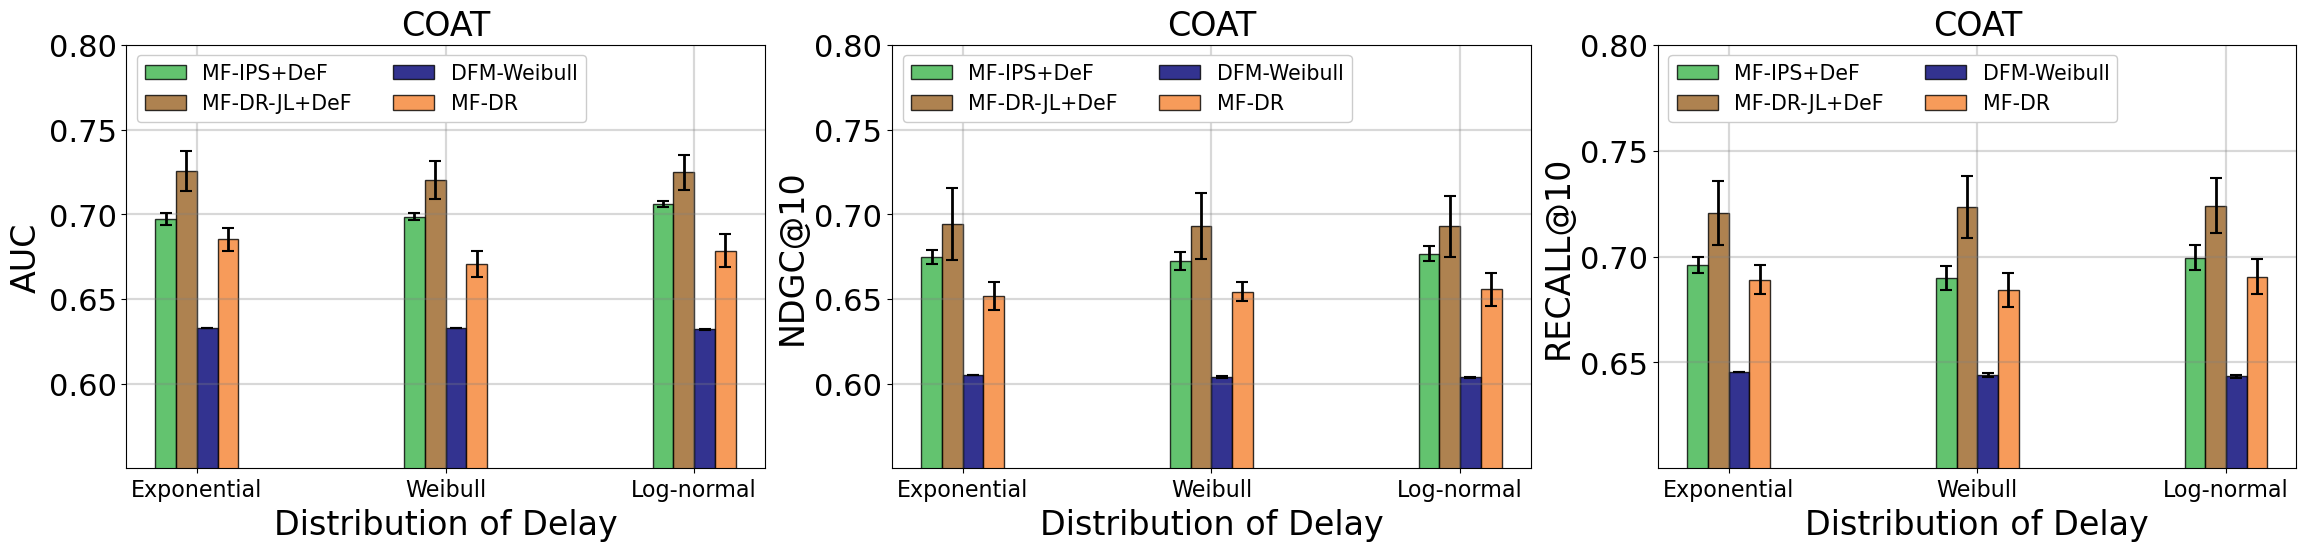

In [36]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3,figsize=(28, 5.5))
plt.subplots_adjust(hspace=0.5)
bar_width = 0.1
# index = np.array([0.2, 1.1, 2.0, 2.9])
index = np.array([0.3, 1.5, 2.7])
# bar_width = 0.1
plt.rc('font', size=20)
colors = ['#3cb44b', '#9A6324', '#000075', '#f58231']#, '#911eb4', '#e6194B', '#4363d8']#, '#3cb44b', '#9A6324', '#000075', '#f58231', '#911eb4', '#e6194B', '#4363d8']
error_params=dict(elinewidth=2,ecolor='k',capsize=4.5, capthick = 1.5)

for i, ax in enumerate(axes):
    datas = results[i]
    datas_error = results_error[i]

    for j in range(len(datas)):
#         if j < 2 :
#             continue
#         else:
        ax.bar(index + 0.1 * j, (datas[j][0], datas[j][1], datas[j][2] ), bar_width,
                alpha=0.8,color=colors[j],edgecolor="k",hatch="", yerr=(datas_error[j][0], datas_error[j][1], datas_error[j][2] ), error_kw=error_params,
                label='Naive')
#         ax.plot(datas[j], marker='o', color=colors[j], markersize=8, linewidth=2)

#     ax.set_ylim(0.08, 0.16)
    # ax.set_xlim(-0.5, 5.5)
    ax.grid(color='gray', linestyle='-', zorder=0, alpha=0.3, linewidth=1.6)

    if i == 0:
        ax.set_ylabel('AUC', fontsize = 24)
    elif i == 1:
        ax.set_ylabel('NDGC@10', fontsize = 24)
    else:
        ax.set_ylabel('RECALL@10', fontsize = 24)
    
    if i == 0:        
        ax.yaxis.set_ticks(np.arange(0.6, 0.80, 0.05), labels=['0.60', '0.65', '0.70', '0.75', '0.80'], fontsize = 22)        
        ax.set_ylim(0.55, 0.8)# ax.set_yticklabels([0.0,'',0.1,'',0.2, '', 0.3], fontsize = 28)
        ax.set_title('COAT', pad = 7)
        ax.legend(['MF-IPS+DeF', 'MF-DR-JL+DeF', 'DFM-Weibull', 'MF-DR'], loc = 'upper left',
                           frameon=True, framealpha=1, ncol = 2, fontsize = 14.8, shadow=False)    
        
    elif i == 1:        
        ax.yaxis.set_ticks(np.arange(0.6, 0.80, 0.05), labels=['0.60', '0.65', '0.70', '0.75', '0.80'], fontsize = 22) 
        ax.set_ylim(0.55, 0.8)
        ax.set_title('COAT', pad = 7)
        ax.legend(['MF-IPS+DeF', 'MF-DR-JL+DeF', 'DFM-Weibull', 'MF-DR'], loc = 'upper left',
                           frameon=True, framealpha=1, ncol = 2, fontsize = 14.8, shadow=False)            #         ax.set_yticklabels(['0.50', '', '0.60', '', '0.70', ''], fontsize = 28)
    else :#         ax.set_ylim(0.1, 0.2)
        ax.yaxis.set_ticks(np.arange(0.65, 0.80, 0.05), labels=['0.65', '0.70', '0.75', '0.80'],  fontsize = 22)
        ax.set_ylim(0.6, 0.8)
        ax.set_title('COAT', pad = 7)
        ax.legend(['MF-IPS+DeF', 'MF-DR-JL+DeF', 'DFM-Weibull', 'MF-DR'], loc = 'upper left',
                           frameon=True, framealpha=1, ncol = 2, fontsize = 14.8, shadow=False)            #         ax.set_yticklabels([0.1,'',0.15,'',0.2], fontsize = 28) #     ax.set_xticks([0, 1, 2, 3, 4, 5])
    
#     if i == 0:
#         ax.set_xticklabels([' (0.5)','','FPR(0.6)'])
#     elif i == 1:
#         ax.set_xticklabels(['FNR (0.5)','','FNR(0.6)'])
#     else:
#         ax.set_xticklabels(['Regret (0.5)','','Regret(0.6)'])    
    
    ax.set_xlabel(r'Distribution of Delay', fontsize = 24, labelpad = 5)
    # ax.set_xticks([0.35, 1.25, 2.15, 3.05])
    ax.set_xticks([0.45, 1.65, 2.85])
    ax.set_xticklabels(['Exponential', 'Weibull', 'Log-normal'], fontsize = 16)
#     if i == 0:
#         ax.set_ylabel('Regret', fontsize = 28, labelpad = 5)
#     ax.set_yticks([0.08,0.12,0.16,0.20,0.24,0.28])
#     ax.set_yticklabels([0.08,0.12,0.16,'0.20','0.34','0.48'])

#     if i == 2:
#         legend = ax.legend(['CFRNet','ESCFR','DragonNet', r'w/o $L^{\prime}_{\theta}(f, {\tau})$',r'w/o $L^{\prime}_{\theta}(\mu_0, \mu_1)$','CTRL','Oracle'], 
#                            frameon=True, framealpha=1, ncol = 7, bbox_to_anchor = (0.53,1.3), fontsize = 36.25, shadow=False)
#         legend.get_frame().set_facecolor('lightgray')
plt.savefig('delay_sensitivity.svg', dpi=400, bbox_inches = 'tight')
plt.savefig('delay_sensitivity.png', dpi=200, bbox_inches = 'tight')
plt.show()

# Figure for the sensitivity of data ratio

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
plt.rc('font',family='sans-serif')
# fig, ax = plt.subplots()
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
plt.rc('font')

est1 = np.array([[0.72989327, 0.69892754, 0.70664302], [0.7164094, 0.68108243, 0.69477173], [0.69726462, 0.67488807, 0.69599892], [0.68342799, 0.66925102, 0.6884599], [0.6697442, 0.67061579, 0.6984237]])
error_est1 = np.array([[0.00256245, 0.00398987, 0.0073295], [0.00290454, 0.00689366, 0.00460747], [0.00355819, 0.00415612, 0.00376149], [0.00376395, 0.00797329, 0.00547514], [0.00400003, 0.00874313, 0.01247728]])
est2 = np.array([[0.73033695, 0.69486481, 0.72924144], [0.72447395, 0.69253478, 0.72420532], [0.72525052, 0.6943029, 0.72079609], [0.71902011, 0.68770006, 0.71056598], [0.71540756, 0.69299181, 0.71570684]])
error_est2 = np.array([[0.00791519, 0.01322214, 0.00918483], [0.00828202, 0.01366585, 0.00823181], [0.01181638, 0.0212155, 0.01513417], [0.00765896, 0.01235234, 0.00812444], [0.00731701, 0.01504092, 0.00868716]])
est3 = np.array([[0.63258938, 0.60559161, 0.64532908], [0.63256166, 0.60560667, 0.6452946], [0.63265456, 0.60533727, 0.64539805], [0.63265394, 0.60550336, 0.64539805], [0.63265613, 0.60560121, 0.64515667]])
error_est3 = np.array([[5.56304954e-05, 1.56202401e-04, 1.37931034e-04], [4.42248105e-05, 1.22088465e-04, 1.58019852e-04], [2.82339687e-05, 5.06445465e-05, 1.11022302e-16], [2.76129613e-05, 1.93470770e-04, 1.11022302e-16], [2.35167819e-05, 1.55065708e-04, 2.69318954e-04]])
est4 = np.array([[0.69826667, 0.65544463, 0.68680603], [0.69254462, 0.6612974, 0.69350402], [0.68508786, 0.65197622, 0.6891084], [0.67516347, 0.65264442, 0.68415853], [0.65626479, 0.6447231, 0.68082537]])
error_est4 = np.array([[0.00742935, 0.00722886, 0.01325494], [0.01046016, 0.00735882, 0.01060449], [0.00661972, 0.00829983, 0.00700589], [0.01007496, 0.01333571, 0.01366623], [0.00556618, 0.0131921, 0.01403565]])

# AUC
est1_auc = est1[:, 0]
error_est1_auc = error_est1[:, 0]
est2_auc = est2[:, 0]
error_est2_auc = error_est2[:, 0]
est3_auc = est3[:, 0]
error_est3_auc = error_est3[:, 0]
est4_auc = est4[:, 0]
error_est4_auc = error_est4[:, 0]

# NDGC
est1_ndgc = est1[:, 1]
error_est1_ndgc = error_est1[:, 1]
est2_ndgc = est2[:, 1]
error_est2_ndgc = error_est2[:, 1]
est3_ndgc = est3[:, 1]
error_est3_ndgc = error_est3[:, 1]
est4_ndgc = est4[:, 1]
error_est4_ndgc = error_est4[:, 1]

# RECALL
est1_recall = est1[:, 2]
error_est1_recall = error_est1[:, 2]
est2_recall = est2[:, 2]
error_est2_recall = error_est2[:, 2]
est3_recall = est3[:, 2]
error_est3_recall = error_est3[:, 2]
est4_recall = est4[:, 2]
error_est4_recall = error_est4[:, 2]

results=[
    [est1_auc, est2_auc, est3_auc, est4_auc], 
    [est1_ndgc, est2_ndgc, est3_ndgc, est4_ndgc], 
    [est1_recall, est2_recall, est3_recall, est4_recall]
]
results_error = [
    [error_est1_auc, error_est2_auc, error_est3_auc, error_est4_auc], 
    [error_est1_ndgc, error_est2_ndgc, error_est3_ndgc, error_est4_ndgc], 
    [error_est1_recall, error_est2_recall, error_est3_recall, error_est4_recall] 
]

In [38]:
results_upper = [ [ x0+1.96*y0 for (x0, y0) in zip(x, y) ] for (x, y) in zip(results, results_error) ]
results_lower = [ [ x0-1.96*y0 for (x0, y0) in zip(x, y) ] for (x, y) in zip(results, results_error) ]

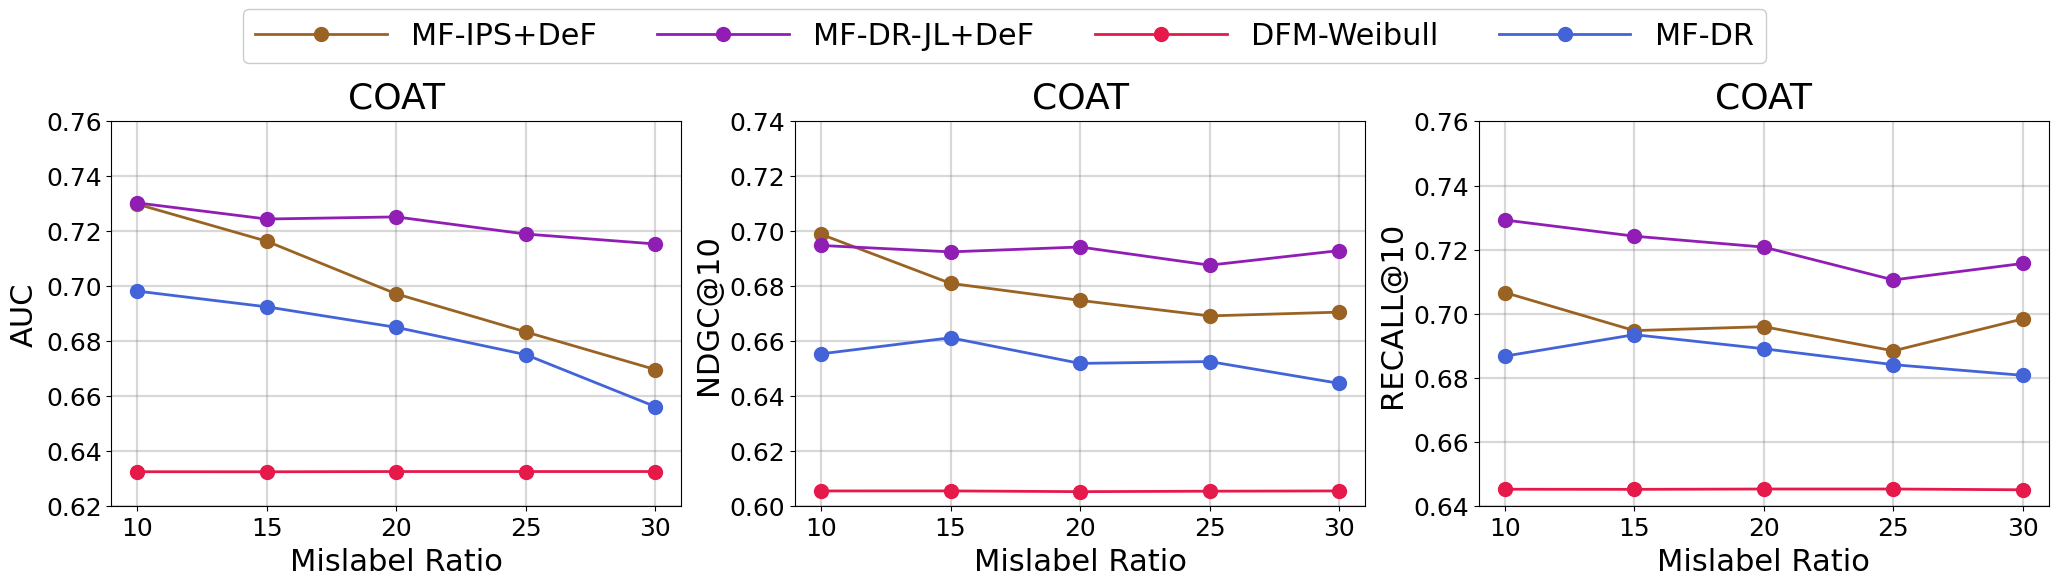

In [39]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3,figsize=(25, 5))
plt.subplots_adjust(hspace=0.5)


colors = ['#9A6324', '#911eb4', '#e6194B', '#4363d8']

for i, ax in enumerate(axes):
    datas = results[i]
    datas_low = results_lower[i]
    datas_high = results_upper[i]
    x = np.arange(10, 35, 5)

    for j in range(len(datas)):
#         if j < 2 :
#             continue
#         else:
        ax.plot(x, datas[j], marker='o', color=colors[j], markersize=10, linewidth=2)
        # ax.fill_between(x, datas_low[j], datas[j], color = colors[j], alpha = 0.1)
        # ax.fill_between(x, datas_high[j], datas[j], color = colors[j], alpha = 0.1)
    
    if i == 0:
        ax.set_ylim(0.62, 0.76)
        ax.yaxis.set_ticks(np.arange(0.62, 0.77, 0.02), ['0.62', '0.64', '0.66', '0.68', '0.70', '0.72', '0.74', '0.76'], fontsize = 18)
        # ax.set_yticklabels(np.arange(0.62, 0.78, 0.02), ['0.62', '0.64', '0.66', '0.68', '0.70', '0.72', '0.74', '0.76'], fontsize = 18)
    elif i == 1:
        ax.set_ylim(0.60, 0.74)
        ax.yaxis.set_ticks(np.arange(0.60, 0.75, 0.02), ['0.60', '0.62', '0.64', '0.66', '0.68', '0.70', '0.72', '0.74'], fontsize = 18)
        # ax.set_yticklabels(np.arange(0.60, 0.76, 0.02), ['0.60', '0.62', '0.64', '0.66', '0.68', '0.70', '0.72', '0.74'], fontsize = 18)        
    elif i == 2:
        ax.set_ylim(0.64, 0.76)
        # ax.set_yticklabels(np.arange(0.64, 0.78, 0.02), ['0.64', '0.66', '0.68', '0.70', '0.72', '0.74', '0.76'], fontsize = 18)
        ax.yaxis.set_ticks(np.arange(0.64, 0.77, 0.02), ['0.64', '0.66', '0.68', '0.70', '0.72', '0.74', '0.76'], fontsize = 18)          
    # ax.set_xlim(-0.5, 5.5)
    ax.grid(color='gray', linestyle='-', zorder=0, alpha=0.3, linewidth=1.6)
#     ax.yaxis.set_ticks(np.arange(0.08, 0.18, 0.02), fontsize = 20)

    ax.xaxis.set_ticks(x, [str(x0) for x0 in x], fontsize = 18)
    # ax.set_xticks(x, fontsize = 18)
    # ax.set_xticklabels([str(x0) for x0 in x], fontsize = 18)
#     ax.set_yticklabels(['0.08','0.10','0.12','0.14','0.16'], fontsize = 20)
    
    ax.set_xlabel('Mislabel Ratio', fontsize = 22, labelpad = 5)
    if i == 0:
        ax.set_ylabel('AUC', fontsize = 22, labelpad = 5)
        ax.set_title('COAT', fontsize = 26, pad = 10)
    elif i == 1:
        ax.set_ylabel('NDGC@10', fontsize = 22, labelpad = 5)
        ax.set_title('COAT', fontsize = 26, pad = 10)
    elif i == 2:
        ax.set_ylabel('RECALL@10', fontsize = 22, labelpad = 5)   
        ax.set_title('COAT', fontsize = 26, pad = 10)
#     ax.set_yticks([0.08,0.12,0.16,0.20,0.24,0.28])
#     ax.set_yticklabels([0.08,0.12,0.16,'0.20','0.34','0.48'])

    if i == 2:
        legend = ax.legend(['MF-IPS+DeF', 'MF-DR-JL+DeF', 'DFM-Weibull', 'MF-DR'], 
                               handlelength = 4.35,frameon=True, framealpha=1, ncol = 4, bbox_to_anchor = (1.03-0.5,1.33), fontsize = 21.8, shadow=False)
#         legend.get_frame().set_facecolor('lightgray')
plt.savefig('mislabel_sensitivity.svg', dpi=400, bbox_inches = 'tight')
plt.savefig('mislabel_sensitivity.png', dpi=200, bbox_inches = 'tight')
plt.show()